In [80]:
directory='/Users/julnow/gsi/cbm/ML/JupyterNotebooks/'
sign_27 = directory+'img/xgb_3.3gev/27.5mf/'+'signal.feather'
all_27 = directory+'img/xgb_3.3gev/27.5mf/'+'all.feather'
sign_56 = directory+'img/xgb_3.3gev/56mf/'+'signal.feather'
all_56 = directory+'img/xgb_3.3gev/56mf/'+'all.feather'
sign_100=directory+'img/xgb_12agev/100mf/'+'signal.feather'

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
#from hipe4ml.model_handler import ModelHandler
#from hipe4ml.tree_handler import TreeHandler
from matplotlib.patches import ConnectionPatch
from matplotlib.backends.backend_pdf import PdfPages
#from hipe4ml import plot_utils

import xgboost as xgb
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz

from sklearn.model_selection import cross_val_score
import scipy
from scipy.stats import uniform

from numpy import sqrt, log, argmax

import weakref 
import itertools

from CBM_ML import tree_importer,  KFPF_lambda_cuts, plot_tools
from bayes_opt import BayesianOptimization
from bayes_opt import SequentialDomainReductionTransformer

import gc, os
import feather

In [3]:
sign27 = pd.read_feather(sign_27)
all27 = pd.read_feather(all_27)
sign56 = pd.read_feather(sign_56)
all56 = pd.read_feather(all_56)

In [81]:
sign100 = pd.read_feather(sign_100)

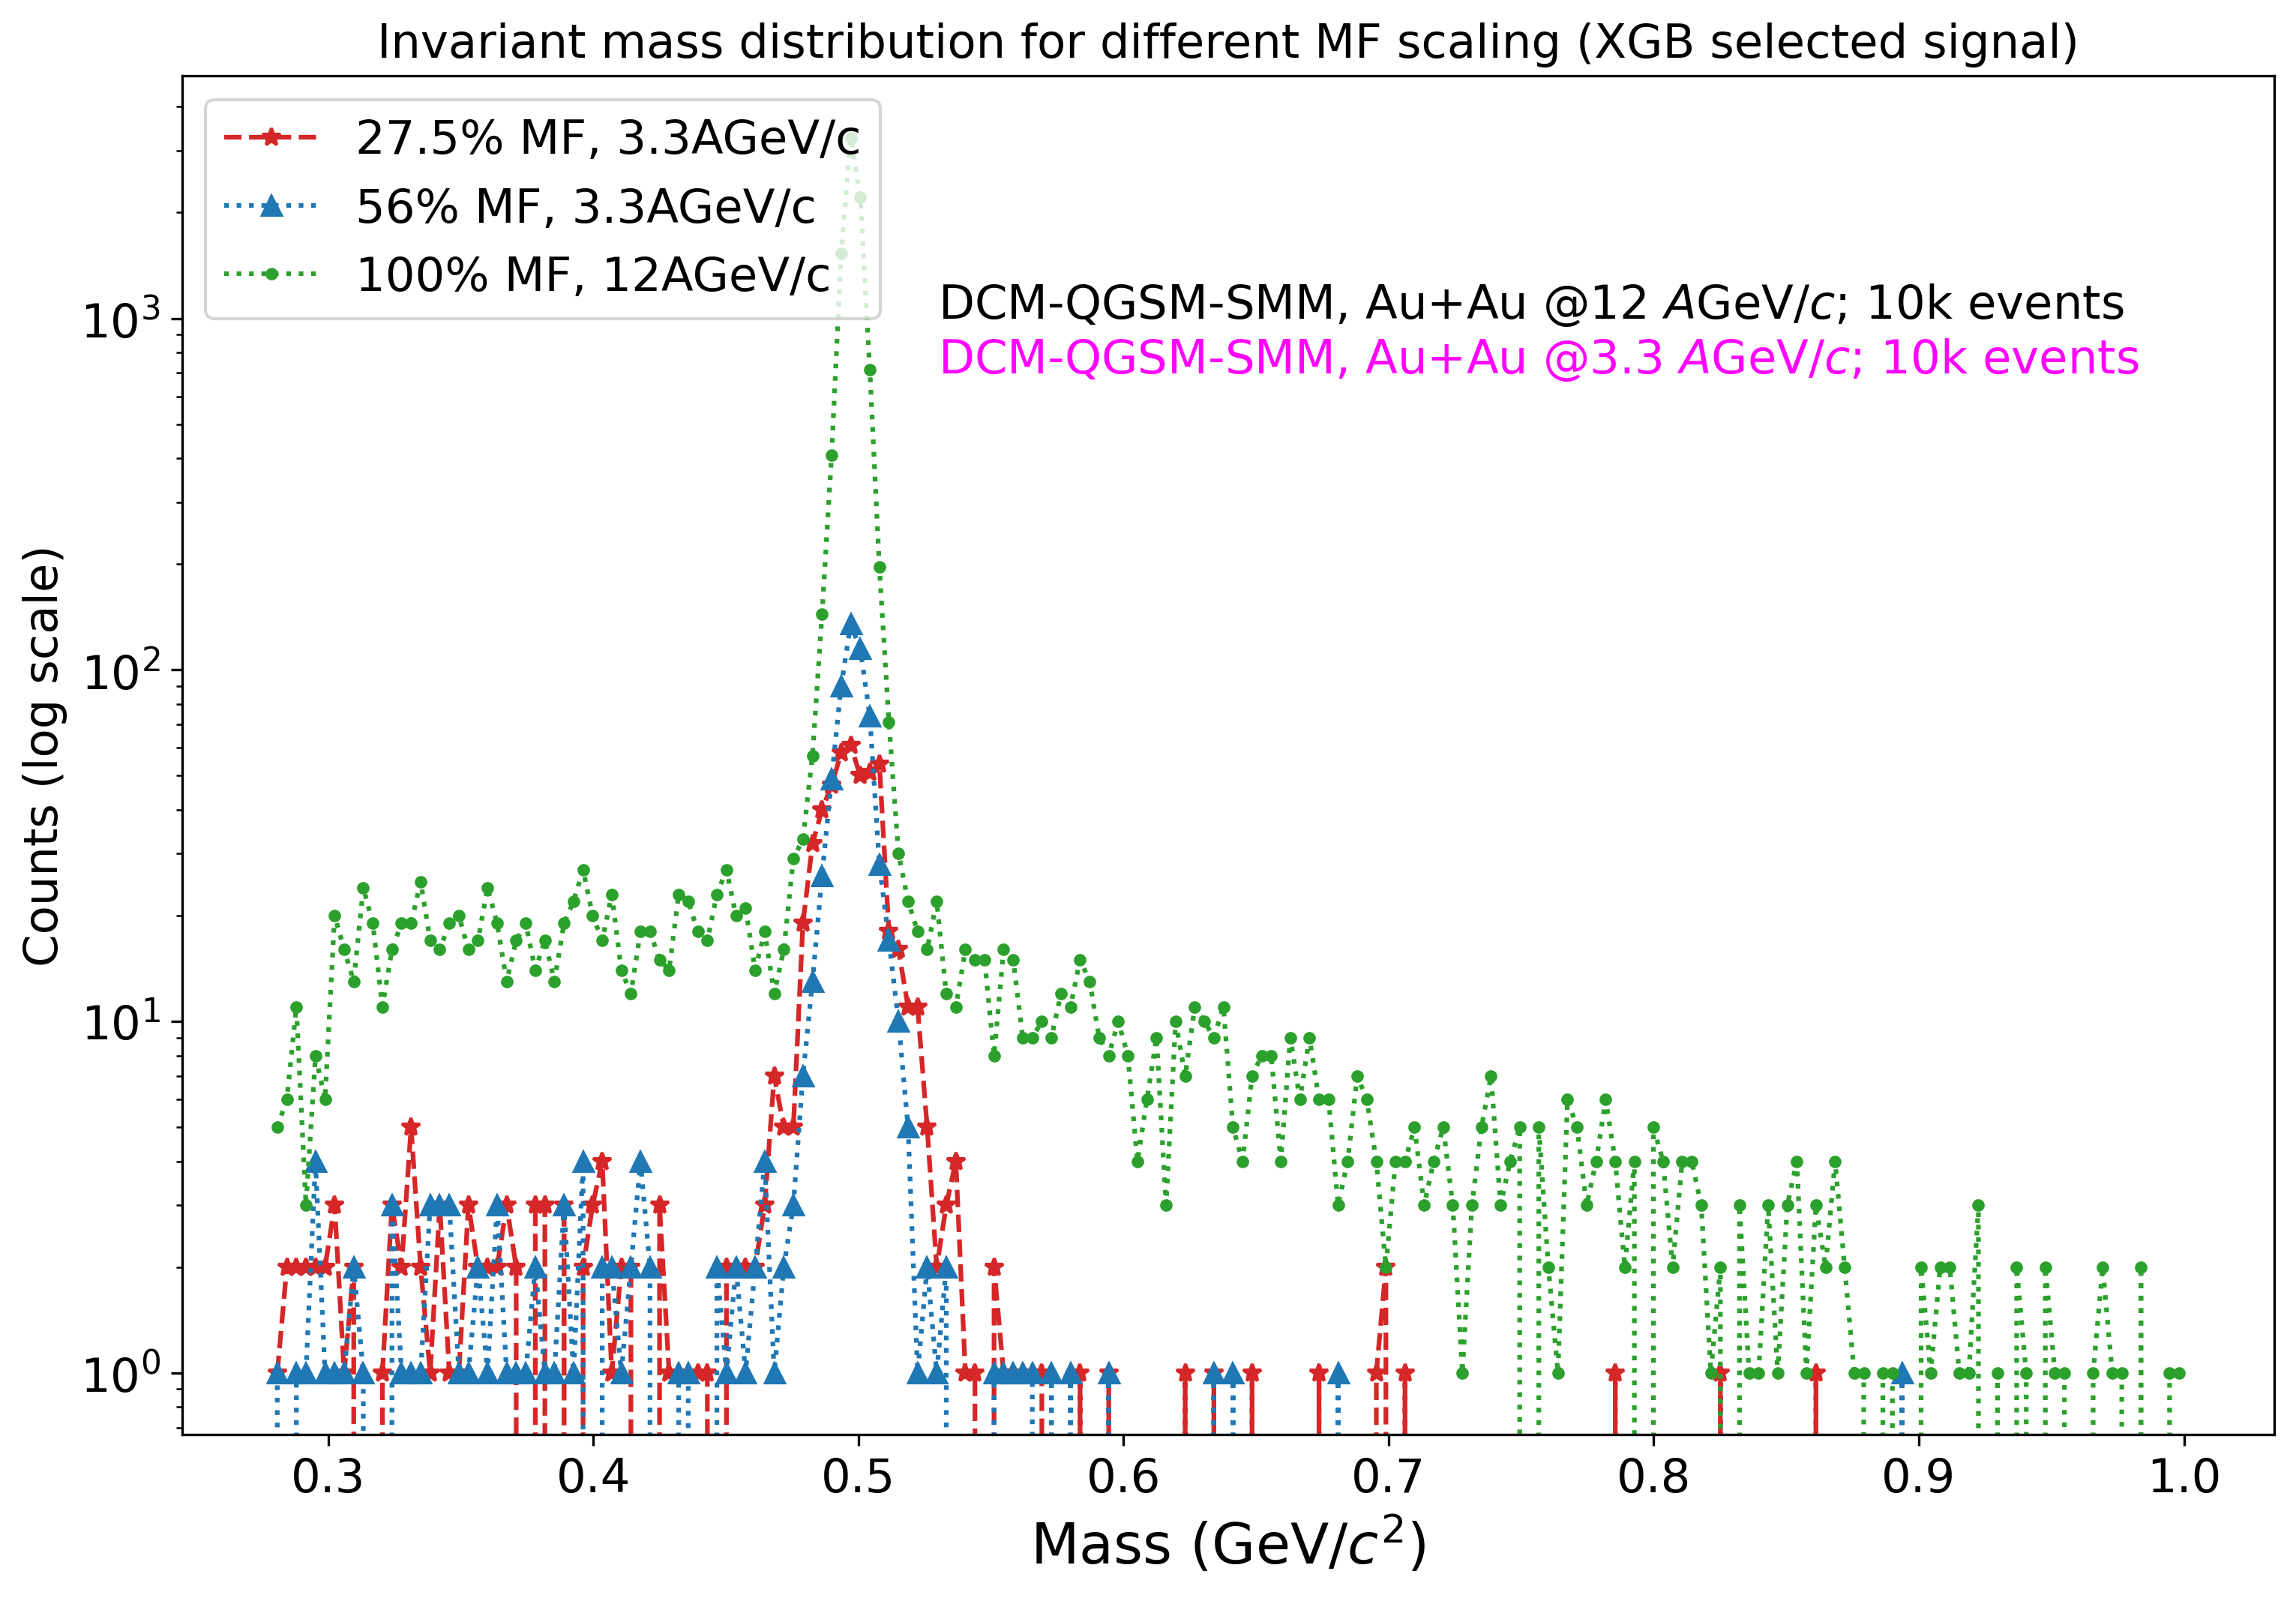

In [110]:
bins1 = 200
range1 = (0.279, 1)
fig, ax2 = plt.subplots(figsize=(12, 8), dpi = 300)
ax2.set_ylabel('Counts (log scale)', fontsize = 15, color='black')
ax2.tick_params(axis='y', labelcolor='black')

ax2.tick_params(axis='both', which='major', labelsize=15)
ax2.set_xlabel("Mass (GeV/${c^2}$)", fontsize = 18)

# ax1 = ax2.twinx()
# ax1.set_xlabel('Mass in GeV', fontsize = 15)
# ax1.set_ylabel('Counts ', fontsize = 15, color=color2)
# ax1.tick_params(axis='y', labelcolor=color2)


def subplot(al, sign, marker, linestyle, label, color, color2):
#     counts, bin_edges = np.histogram(al['mass'],bins = bins1, range=range1)
#     bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.
#     ax2.plot(bin_centers, counts, color=color, linestyle=linestyle, marker=marker, label=label)
    
    counts, bin_edges = np.histogram(sign['mass'],bins = 200, range=range1)
    bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.
    ax2.plot(bin_centers, counts, color=color2, linestyle=linestyle, marker=marker, label=label)

subplot(all27, sign27.sample(frac=0.1), marker='*', linestyle='dashed', label='27.5% MF, 3.3AGeV/c', color = 'tab:blue', color2 = 'tab:red')
subplot(all56, sign56.sample(frac=0.1), marker='^', linestyle='dotted', label='56% MF, 3.3AGeV/c', color = 'tab:cyan', color2 = 'tab:blue')
subplot(all56, sign100, marker='.', linestyle='dotted', label='100% MF, 12AGeV/c', color = 'tab:cyan', color2 = 'tab:green')

ax2.legend( fontsize = 15, loc='upper left')
# ax1.legend( fontsize = 15,loc='upper right' )
ax2.text(0.53, 1000, r'DCM-QGSM-SMM, Au+Au @12 $A$GeV/$c$; 10k events', fontsize=15)
ax2.text(0.53, 700, r'DCM-QGSM-SMM, Au+Au @3.3 $A$GeV/$c$; 10k events', fontsize=15, color = 'magenta',)
plt.title("Invariant mass distribution for different MF scaling (XGB selected signal)", fontsize = 15)
ax2.set_yscale('log')
#plt.text(0.02, 0.1, r'cut > %.4f'%cut, fontsize=15)
plt.show()
fig.tight_layout()
fig.savefig(directory+'img/mf.pdf')

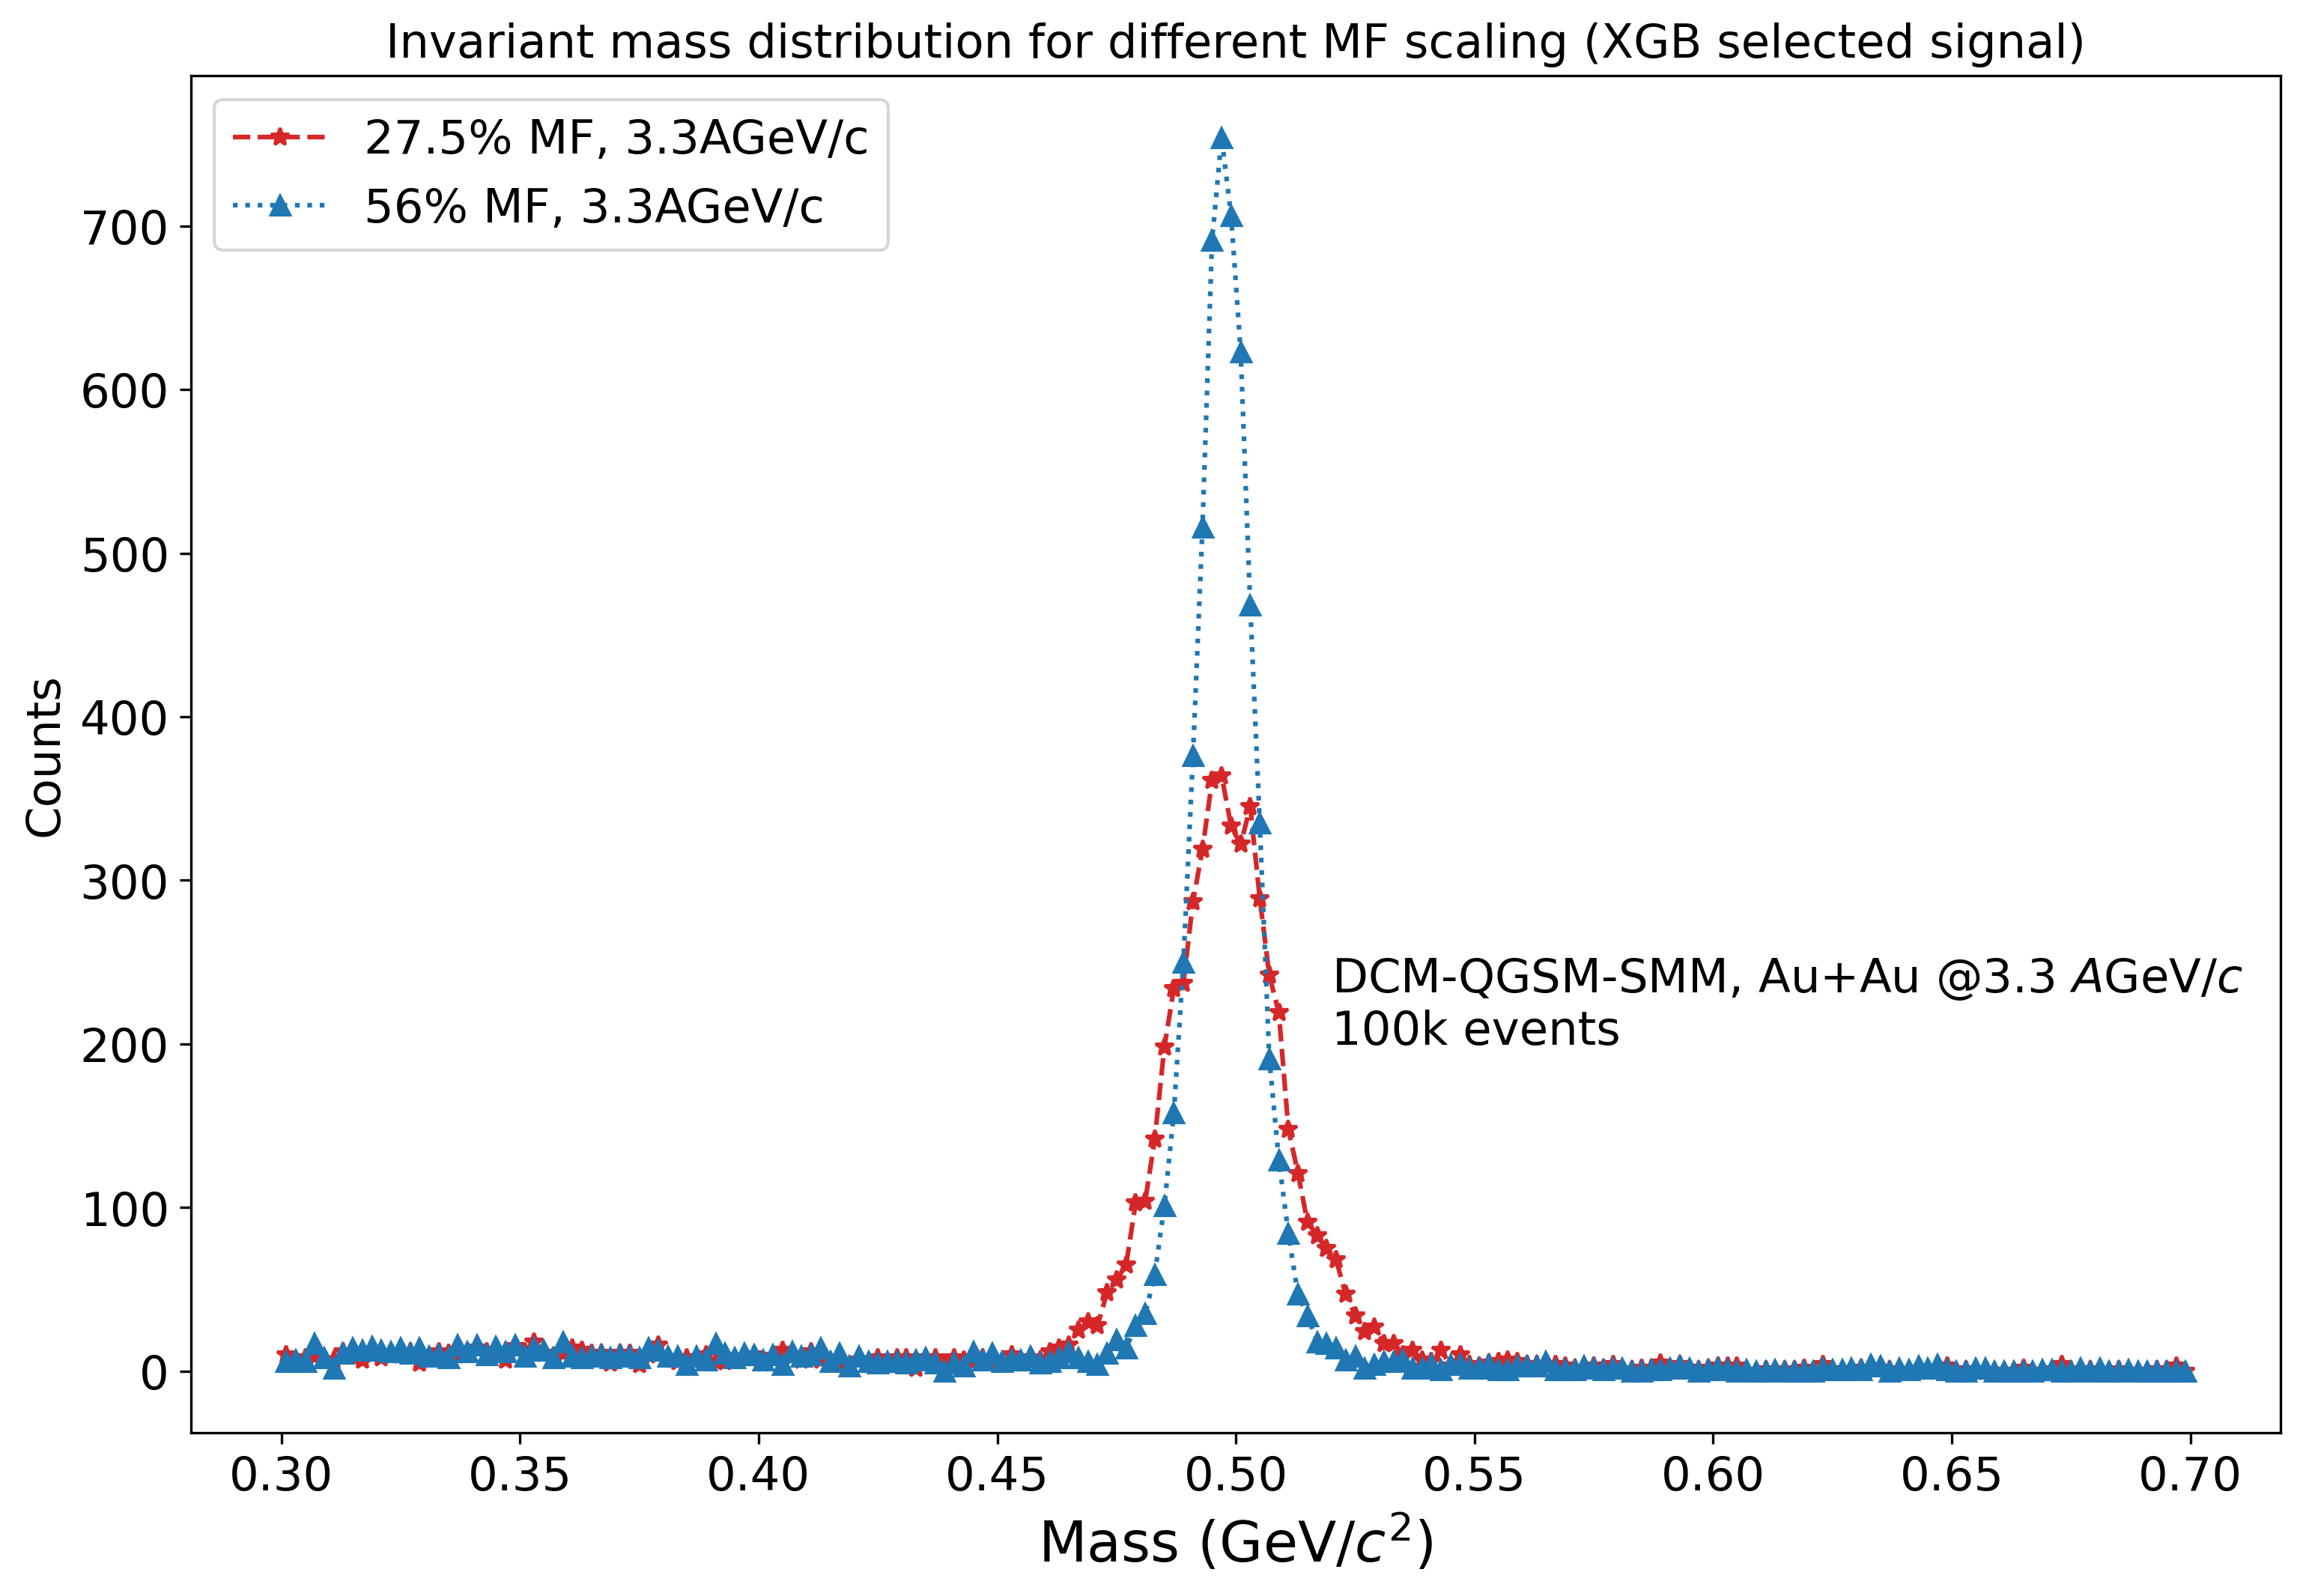

In [109]:
bins1 = 50
range1 = (0.3, 0.7)
fig, ax2 = plt.subplots(figsize=(12, 8), dpi = 300)
ax2.set_ylabel('Counts', fontsize = 15, color='black')
ax2.tick_params(axis='y', labelcolor='black')

ax2.tick_params(axis='both', which='major', labelsize=15)
ax2.set_xlabel("Mass (GeV/${c^2}$)", fontsize = 18)

# ax1 = ax2.twinx()
# ax1.set_xlabel('Mass in GeV', fontsize = 15)
# ax1.set_ylabel('Counts ', fontsize = 15, color=color2)
# ax1.tick_params(axis='y', labelcolor=color2)


def subplot(al, sign, marker, linestyle, label, color, color2):
#     counts, bin_edges = np.histogram(al['mass'],bins = bins1, range=range1)
#     bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.
#     ax2.plot(bin_centers, counts, color=color, linestyle=linestyle, marker=marker, label=label)
    
    counts, bin_edges = np.histogram(sign['mass'],bins = 200, range=range1)
    bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.
    ax2.plot(bin_centers, counts, color=color2, linestyle=linestyle, marker=marker, label=label)

subplot(all27, sign27, marker='*', linestyle='dashed', label='27.5% MF, 3.3AGeV/c', color = 'tab:blue', color2 = 'tab:red')
subplot(all56, sign56, marker='^', linestyle='dotted', label='56% MF, 3.3AGeV/c', color = 'tab:cyan', color2 = 'tab:blue')

ax2.legend( fontsize = 15, loc='upper left')
# ax1.legend( fontsize = 15,loc='upper right' )
ax2.text(0.52, 200, r'DCM-QGSM-SMM, Au+Au @3.3 $A$GeV/$c$''\n100k events', fontsize=15)
plt.title("Invariant mass distribution for different MF scaling (XGB selected signal)", fontsize = 15)
#plt.text(0.02, 0.1, r'cut > %.4f'%cut, fontsize=15)
plt.show()
fig.tight_layout()
fig.savefig(directory+'img/mf_zoom.pdf')